In [21]:
from adaptive_mesh_refiner.adaptive_meshing import AdaptiveMeshRefiner
from src.radiation_algorithm.radiation_algorithm import radiation_algorithm
from efield.efield1 import calculate_electric_magnetic_field_at_point
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern

import numpy as np
import os
import time

In [22]:
def traitement_de_(filename):
    base_name = os.path.splitext(os.path.basename(filename))[0]
    print(f"Traitement de l'antenne {base_name}")

filename_mesh1_bowtie2 = 'data/antennas_mesh/bowtie2.mat'

In [23]:
W = 250 / 1000
H = 500 / 1000
wf = 20 / 1000

points = {
    'point_0' : (-W/2, -H/2),
    'point_1' : (-wf/2, 0),
    'point_2' : (-W/2, H/2),
    'point_3' : (W/2, H/2),
    'point_4' : (wf/2, 0),
    'point_5' : (W/2, -H/2)
}

# Declaration des points du contour
vertices = [points[point] for point in points]

# Indices des segments formant le contour
segments = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (1, 4)]

# Construire le dictionnaire pour Triangle
bowtie2_antenna = dict(vertices=vertices, segments=segments)


In [24]:
feed_point_bowtie2 = [0, 0, 0]
voltage_amplitude = 1  # Valeur de l'amplitude égale à 1 volt

In [25]:
bowtie2_name = "bowtie2"
bowtie2_folder = "data/antennas_mesh/"

# Création de l'objet de raffinage
mesh_bowtie2 = AdaptiveMeshRefiner()

# Étape 1 : Génération de la triangulation initiale avec un niveau moyen
mesh_bowtie2.initial_meshing(bowtie2_antenna, bowtie2_name, bowtie2_folder, refinement_level="ultra")

# show_mesh(points, triangles, feed_point_IFA)  # Change "black" si besoin
mesh_bowtie2.show_mesh(feed_point_bowtie2)

Utilisation des options de triangulation : pq20a0.00001YY
Nombre de points = 14
Nombre de triangles = 20
Matrice points shape = (3, 14)
Matrice triangles shape = (4, 20)
Data saved successfully to data/antennas_mesh/bowtie2.mat


In [26]:
number_of_refinement = 5  # Nombre maximum d'itérations

tolerance = 1e-2  # Seuil de variation relatif (1%)

previous_impedance = None  # Stocke l'impédance de l'itération précédente
actual_iterations = 0  # Compteur d'itérations effectives

for i in range(number_of_refinement):
    start_time = time.time()
    
    traitement_de_(filename_mesh1_bowtie2)
    impedance, selected_triangles = radiation_algorithm(filename_mesh1_bowtie2, 75e6, feed_point_bowtie2, voltage_amplitude, load_from_matlab=False)
    
    elapsed_time = time.time() - start_time
    print(f"Temps écoulé pour le traitement de l'antenne étudiée : {elapsed_time:.6f} secondes")
    print(f"Impédance actuelle : {impedance}\n")

    actual_iterations += 1
    
    # Vérifier la convergence de l'impédance
    if previous_impedance is not None:
        delta_impedance = np.abs(impedance - previous_impedance) / np.abs(previous_impedance)
        print(f"Variation relative de l'impédance : {delta_impedance:.6f}")

        if delta_impedance < tolerance:
            print("La variation de l'impédance est inférieure au seuil. Arrêt du raffinage.")
            break  # Sortir de la boucle

    previous_impedance = impedance  # Mettre à jour l'impédance précédente

    # Tentative d'affinage du maillage
    try:
        mesh_bowtie2.adaptative_meshing(bowtie2_antenna, selected_triangles, bowtie2_name, bowtie2_folder)
        mesh_bowtie2.show_mesh(feed_point_bowtie2)
    except ValueError as e:
        print(f"Exception attrapée : {e}")
        break  # Arrêter si une erreur survient

# Affichage du nombre d'itérations utilisées
print(f"Nombre total d'itérations effectuées : {actual_iterations}")


Traitement de l'antenne bowtie2
Total numbers of Edges is = 27
Aucune jonction complexe trouvée....
Total numbers of Edges is = 27
Data saved successfully to data/antennas_mesh1/bowtie2_mesh1.mat
Data saved successfully to data/antennas_mesh2/bowtie2_mesh2.mat
Temps écoulé pour le calcul de la matrice Z : 0.006646 secondes
Data saved successfully to data/antennas_impedance/bowtie2_impedance.mat
Data loaded from data/antennas_mesh2/bowtie2_mesh2.mat
Data loaded from data/antennas_impedance/bowtie2_impedance.mat
index_feeding_edges near to the feed_point = 4
La valeur de l'impédance d'entrée de l'antenne bowtie2 =  3.2784934 - 341.3567718i Ohm
Gap current of bowtie2 = (2.813307538014504e-05+0.002929216141322101j)
Gap voltage of bowtie2 = (1+0j)
La valeur de feed_power  = 1.406653769007252e-05
Data saved successfully to data/antennas_current/bowtie2_current.mat
Sauvegarde du fichier : bowtie2_current.mat effectué avec succès !
Fréquence de rayonnement de l'antenne : 75000000.0 Hz
Max Curr

Temps écoulé pour le traitement de l'antenne étudiée : 0.057219 secondes
Impédance actuelle : (3.2784934020469128-341.3567717972081j)

Après raffinage
Nombre de points = 24
Nombre de triangles = 40
Matrice points shape = (3, 24)
Matrice triangles shape = (4, 40)
Data saved successfully to data/antennas_mesh/bowtie2.mat


Traitement de l'antenne bowtie2
Total numbers of Edges is = 57
Aucune jonction complexe trouvée....
Total numbers of Edges is = 57
Data saved successfully to data/antennas_mesh1/bowtie2_mesh1.mat
Data saved successfully to data/antennas_mesh2/bowtie2_mesh2.mat
Temps écoulé pour le calcul de la matrice Z : 0.097169 secondes
Data saved successfully to data/antennas_impedance/bowtie2_impedance.mat
Data loaded from data/antennas_mesh2/bowtie2_mesh2.mat
Data loaded from data/antennas_impedance/bowtie2_impedance.mat
index_feeding_edges near to the feed_point = 33
La valeur de l'impédance d'entrée de l'antenne bowtie2 =  3.7338887 - 354.2839255i Ohm
Gap current of bowtie2 = (2.97447442201115e-05+0.0028222814088842176j)
Gap voltage of bowtie2 = (1+0j)
La valeur de feed_power  = 1.487237211005575e-05
Data saved successfully to data/antennas_current/bowtie2_current.mat
Sauvegarde du fichier : bowtie2_current.mat effectué avec succès !
Fréquence de rayonnement de l'antenne : 75000000.0 Hz
Max Cur

Temps écoulé pour le traitement de l'antenne étudiée : 0.409440 secondes
Impédance actuelle : (3.7338887300302166-354.2839255104907j)

Variation relative de l'impédance : 0.037892
Après raffinage
Nombre de points = 58
Nombre de triangles = 108
Matrice points shape = (3, 58)
Matrice triangles shape = (4, 108)
Data saved successfully to data/antennas_mesh/bowtie2.mat


Traitement de l'antenne bowtie2
Total numbers of Edges is = 159
Aucune jonction complexe trouvée....
Total numbers of Edges is = 159
Data saved successfully to data/antennas_mesh1/bowtie2_mesh1.mat
Data saved successfully to data/antennas_mesh2/bowtie2_mesh2.mat
Temps écoulé pour le calcul de la matrice Z : 0.137307 secondes
Data saved successfully to data/antennas_impedance/bowtie2_impedance.mat
Data loaded from data/antennas_mesh2/bowtie2_mesh2.mat
Data loaded from data/antennas_impedance/bowtie2_impedance.mat
index_feeding_edges near to the feed_point = 86
La valeur de l'impédance d'entrée de l'antenne bowtie2 =  3.9509223 - 349.0475855i Ohm
Gap current of bowtie2 = (3.242452093832642e-05+0.002864571865462953j)
Gap voltage of bowtie2 = (1+0j)
La valeur de feed_power  = 1.621226046916321e-05
Data saved successfully to data/antennas_current/bowtie2_current.mat
Sauvegarde du fichier : bowtie2_current.mat effectué avec succès !
Fréquence de rayonnement de l'antenne : 75000000.0 Hz
Max C

Temps écoulé pour le traitement de l'antenne étudiée : 1.264607 secondes
Impédance actuelle : (3.9509222589895705-349.0475855374971j)

Variation relative de l'impédance : 0.014792
Après raffinage
Nombre de points = 160
Nombre de triangles = 312
Matrice points shape = (3, 160)
Matrice triangles shape = (4, 312)
Data saved successfully to data/antennas_mesh/bowtie2.mat


Traitement de l'antenne bowtie2
Total numbers of Edges is = 465
Aucune jonction complexe trouvée....
Total numbers of Edges is = 465
Data saved successfully to data/antennas_mesh1/bowtie2_mesh1.mat
Data saved successfully to data/antennas_mesh2/bowtie2_mesh2.mat
Temps écoulé pour le calcul de la matrice Z : 0.936525 secondes
Data saved successfully to data/antennas_impedance/bowtie2_impedance.mat
Data loaded from data/antennas_mesh2/bowtie2_mesh2.mat
Data loaded from data/antennas_impedance/bowtie2_impedance.mat
index_feeding_edges near to the feed_point = 250
La valeur de l'impédance d'entrée de l'antenne bowtie2 =  4.0430236 - 346.4641642i Ohm
Gap current of bowtie2 = (3.367677550636248e-05+0.0028859084065739294j)
Gap voltage of bowtie2 = (1+0j)
La valeur de feed_power  = 1.683838775318124e-05
Data saved successfully to data/antennas_current/bowtie2_current.mat
Sauvegarde du fichier : bowtie2_current.mat effectué avec succès !
Fréquence de rayonnement de l'antenne : 75000000.0 Hz
Max

Temps écoulé pour le traitement de l'antenne étudiée : 4.663141 secondes
Impédance actuelle : (4.043023628785897-346.464164185965j)

Variation relative de l'impédance : 0.007406
La variation de l'impédance est inférieure au seuil. Arrêt du raffinage.
Nombre total d'itérations effectuées : 4


In [27]:
filename_mesh2_bowtie2 = 'data/antennas_mesh2/bowtie2_mesh2.mat'
filename_current_bowtie2 = 'data/antennas_current/bowtie2_current.mat'
filename_gain_power_bowtie2 = 'data/antennas_gain_power/bowtie2_gain_power.mat'
filename_sphere_dense = 'data/sphere_mesh/sphere_dense.mat'

In [28]:
# Point d'observation pour le calcul des champs
observation_point = np.array([0, 0, 10])

# Étape 1 : Calcul du champ électrique et magnétique à un point donné
print("Calculating electric and magnetic fields at observation point...")
calculate_electric_magnetic_field_at_point(filename_mesh2_bowtie2, filename_current_bowtie2, observation_point, radiation=True)

Calculating electric and magnetic fields at observation point...
Data loaded from data/antennas_mesh2/bowtie2_mesh2.mat

Frequency = 75000000.0 Hz
Longueur d'onde lambda = 3.9966980530747898 m
Le point d'observation est : [ 0  0 10]

e_field_total of bowtie2 at the observation point [ 0  0 10] is :
 0.0000003 - 0.0000000i V/m
-0.0038784 + 0.0003649i V/m
-0.0000000 + 0.0000000i V/m

h_field_total of bowtie2 at the observation point [ 0  0 10] is :
 0.0000103 - 0.0000010i A/m
 0.0000000 - 0.0000000i A/m
 0.0000000 - 0.0000000i A/m

Poynting vector is equal to : 
-0.000000 W/m^2
-0.000000 W/m^2
 0.000000 W/m^2

w = 2.0219908111587295e-08 W/m^2

u = 2.0219908111587294e-06 W/unit solid angle


In [29]:
# Étape 2 : Distribution de l'intensité du rayonnement sur une sphère
print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(filename_mesh2_bowtie2, filename_current_bowtie2, filename_sphere_dense, radiation=True)

Calculating radiation intensity distribution over sphere surface...
Data loaded from data/antennas_mesh2/bowtie2_mesh2.mat

Frequency = 75000000.0 Hz
Longueur d'onde lambda = 3.9966980530747898 m

Total Power :  0.000017
Gain Linear :  1.458002
Gain Logarithmic :  1.637580 dB
Radiation Resistance :  4.185911 Ohms
Data saved successfully to data/antennas_gain_power/bowtie2_gain_power.mat


Generating antenna directivity pattern...
Data loaded from data/antennas_mesh2/bowtie2_mesh2.mat
Data loaded from data/antennas_gain_power/bowtie2_gain_power.mat


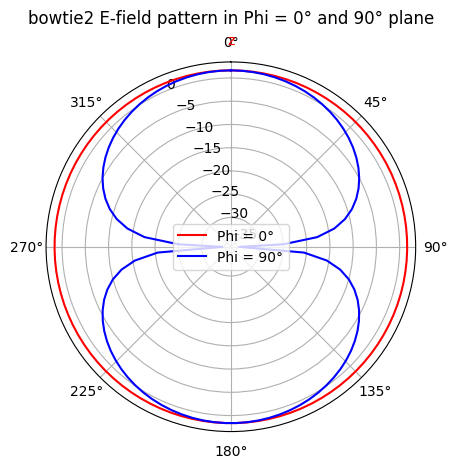

In [30]:
# Étape 3 : Génération du diagramme de directivité
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(filename_mesh2_bowtie2, filename_current_bowtie2, filename_gain_power_bowtie2, radiation=True)